In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Project1/car_data.csv")

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


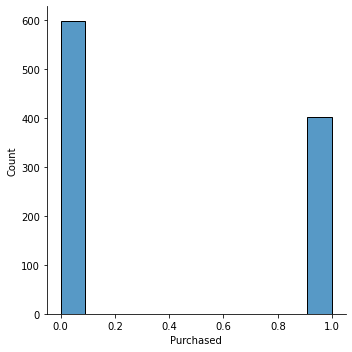

In [5]:
sb.displot(data['Purchased'])

In [6]:
data = data.drop(['Gender'], axis = 1)

In [7]:
data.columns

Index(['User ID', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

## Scaling and Splitting Data

In [8]:
data.Purchased.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [9]:
X = data.drop("Purchased", axis = 1)
y = data.Purchased

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Voting Classifier
## Experiment 1 (80/20 split)

In [13]:
log_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 2000)
random_clf = RandomForestClassifier()
svm_clf = SVC(gamma = 'auto', probability = True)
dt_clf = DecisionTreeClassifier(max_depth = 3)

In [14]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),
                  ('rf', random_clf),
                  ('svc', svm_clf),
                  ('dt', dt_clf)],
    voting = 'soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=2000,
                                                 multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [15]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, random_clf, svm_clf, dt_clf, voting_clf) :
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.84
RandomForestClassifier 0.93
SVC 0.93
DecisionTreeClassifier 0.955
VotingClassifier 0.925


In [16]:
y_pred_voting = voting_clf.predict(X_test)
from sklearn.metrics import  confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_voting))

[[114   6]
 [  9  71]]


In [17]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       120
           1       0.92      0.89      0.90        80

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200



## ROC/AUC

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresh = roc_curve(y_test, y_pred_voting)

Text(0, 0.5, 'TPR')

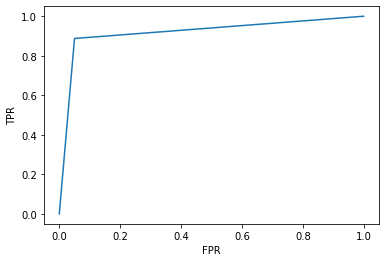

In [19]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [20]:
roc_auc_score(y_test, y_pred_voting)

0.91875

## Experiment 2 (90/10 Split)

In [21]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.1, random_state = 20)

In [22]:
log_clf_2 = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 2000)
random_clf_2 = RandomForestClassifier()
svm_clf_2 = SVC(gamma = 'auto', probability = True)
dt_clf_2 = DecisionTreeClassifier(max_depth = 3)

In [23]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf_2),
                  ('rf', random_clf_2),
                  ('svc', svm_clf_2),
                  ('dt', dt_clf_2)],
    voting = 'soft'
)

voting_clf.fit(X_train_2, y_train_2)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=2000,
                                                 multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('dt', DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [24]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, random_clf, svm_clf, dt_clf, voting_clf) :
  clf.fit(X_train_2, y_train_2)
  y_pred_2 = clf.predict(X_test_2)
  print(clf.__class__.__name__, accuracy_score(y_test_2, y_pred_2))

LogisticRegression 0.82
RandomForestClassifier 0.9
SVC 0.89
DecisionTreeClassifier 0.94
VotingClassifier 0.89


In [25]:
y_pred_voting_2 = voting_clf.predict(X_test_2)
from sklearn.metrics import  confusion_matrix, classification_report
print(confusion_matrix(y_test_2, y_pred_voting_2))

[[58  5]
 [ 6 31]]


In [26]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       120
           1       0.92      0.89      0.90        80

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200

